In [1]:
%matplotlib inline

import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Part 1 Basics of Selecting and Slicing Data

In [3]:
df = pd.read_csv('F:/UofG/STUDY/PTU/PTUA2026-main/PTUA2026-main/Lab04/data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


Q1: how to get 2 columns from the dataframe (city and country)?

In [4]:
df[['city', 'country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


Q2: how to get the first 5 rows of the "city" column?

In [14]:
df['city'].head()

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

Q3: how to use .loc to select the third row of the dataframe?

In [8]:
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

Q4: how to use .loc to select the first row in "country" column?

In [10]:
df.loc[0,'country']

'United Kingdom'

Q5: how to select the first 4 rows of ['city', 'date'] columns?

In [12]:
df.loc[:3,['city','date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


use .iloc for integer position based indexing

Q6: how to get the value from the row in position 3 and the column in position 2

In [13]:
df.iloc[3,2]

'05/14/2014 11:24'

Q7: how to use iloc to select every 300th row from a data set

In [16]:
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


# Part 2 How to select rows by some value(s)

In [17]:
df = pd.read_csv('F:/UofG/STUDY/PTU/PTUA2026-main/PTUA2026-main/Lab04/data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"

In [20]:
df['city_Munich'] = df['city'] == 'Munich'
df.tail()

,lat,lon,date,city,country,city_Munich
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


pandas logical operators are: | for or, & for and, ~ for not

these must be grouped by using parentheses

Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.

In [21]:
df.loc[(df['country'] == 'Spain') & (df['city'] != 'Barcelona')]

,lat,lon,date,city,country,city_Munich
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain,False
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain,False
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain,False
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain,False
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain,False
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain,False


Q11: select rows where either the city is munich, or the country is serbia

In [22]:
df.loc[(df['city'] == 'Munich') | (df['country'] == 'Serbia')]

,lat,lon,date,city,country,city_Munich
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia,False
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia,False
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


Q12: how many observations are west of the prime meridian?

In [23]:
(df['lon'] < 0).sum()

np.int64(24)

Q13: get all rows that contain a city that starts with the letter G

In [24]:
df.loc[df['city'].str.startswith('G')]

,lat,lon,date,city,country,city_Munich
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


Q14: how many unique cities and countries in the dataset? 

Also can you check missing values for the dataframe

In [25]:
df[['city', 'country']].nunique()

city       91
country    15
dtype: int64

In [26]:
df.isna().sum()

lat            0
lon            0
date           0
city           0
country        0
city_Munich    0
dtype: int64

Q15: group by country name and show the city names in each of the country

In [28]:
df.groupby('country')['city'].apply(list)

country
Albania                                                [Berat, Gjirokastër]
Bosnia and Herzegovina                         [Sarajevo, Sarajevo, Mostar]
Croatia                                           [Ploče, Split, Dubrovnik]
Czech Republic            [Novy Bohumin, Hranice, Prerov, Ústí nad Orlic...
Germany                   [Kümmersbruck, Winkelhaid, Kammerstein, Ellhof...
Greece                    [Kakavia, Dytiki Ellada, Dytiki Ellada, Dytiki...
Kosovo                                                            [Prizren]
Macedonia (FYROM)                                                   [Ohrid]
Montenegro                                                          [Kotor]
Poland                    [Zendek, Silesian Voivodeship, Dabrowa Gornicz...
Portugal                  [Lisbon, Lisbon, Lisbon, Lisbon, Lisbon, Lisbo...
Serbia                                      [Belgrade, Belgrade, Slepčević]
Spain                     [El Prat de Llobregat, Viladecans, Barcelona, ...
Turk

# Part 3 How to select based on a date-time values

In [33]:
dt = pd.read_csv('F:/UofG/STUDY/PTU/PTUA2026-main/PTUA2026-main/Lab04/data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


Q16: is the timestamp index unique? How can you use code to find it? 

In [34]:
dt.index.is_unique

False

Q17: drop duplicate index 

In [35]:
dt = dt[~dt.index.duplicated()]

In [36]:
dt.index.is_unique

True

Q18: create a weekday and a weekend dataframe

In [40]:
weekday_df = dt[dt.index.weekday < 5]
weekend_df = dt[dt.index.weekday >= 5]

In [42]:
weekday_df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [43]:
weekend_df.head()

,lat,lon,city,country
date,,,,
2014-05-17 00:09:00,38.711824,-9.137308,Lisbon,Portugal
2014-05-17 00:39:00,38.711833,-9.137317,Lisbon,Portugal
2014-05-17 01:09:00,38.711822,-9.137277,Lisbon,Portugal
2014-05-17 01:39:00,38.711823,-9.137273,Lisbon,Portugal
2014-05-17 01:54:00,38.711828,-9.137279,Lisbon,Portugal


Q19: calculate and plot the number of observations each day of the week has

In [44]:
counts = dt.index.day_name().value_counts()

In [45]:
counts = counts.reindex([
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
])

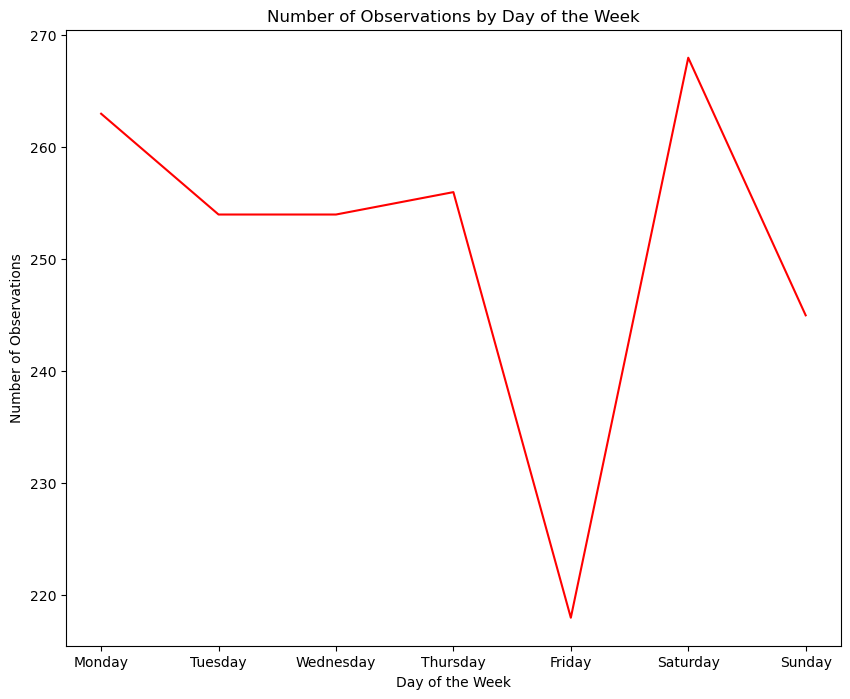

In [47]:
counts.plot(figsize=(10,8), color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Observations')
plt.title('Number of Observations by Day of the Week')
plt.show()